# Predicting Health Insurance Price for an individual or family
---


1- **Proposal**

This proposal is important in today's world because accurate prediction of health insurance costs can have significant implications in the health care and insurance field. It can help insurance companies to better estimate premiums for potential customers, optimize pricing strategies, and manage risk effectively. Accurate predictions can also help individuals and families in making informed decisions about their health insurance coverage and budgeting for health care expenses. Moreover, accurate predictions can contribute to the overall transparency and fairness in the health insurance industry, leading to better customer satisfaction and trust.

The proposed method of predicting health insurance costs based on factors such as age, number of people in families, etc., can be applicable to other types of insurance as well. For example, similar predictive modeling approaches can be used in predicting costs for other types of insurance, such as auto insurance, home insurance, and life insurance. The underlying principles of utilizing historical data, identifying patterns, and building predictive models can be adapted to various insurance domains, making the proposed method a versatile and scalable approach.


Overall, the proposed project can contribute to the advancement of the health care and insurance field by providing accurate predictions of health insurance costs, improving pricing strategies, and enabling better decision-making for individuals and families when it comes to health insurance coverage and expenses. Additionally, the predictive modeling approach can be applicable to other types of insurance as well, making it a versatile and scalable method. Through thorough data analysis and identification of patterns, important features, and relationships in the data, a robust and accurate machine learning model can be built to predict health insurance costs effectively.

2- **If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?**

For Insurance companies it is very difficult task to predict the Insurance Amount. This applies for insurance in every sector. for example : Bike insurance , car insurance , house insurance , death insurance etc. In every sector the problem is same , it is very challenging for companies to finalise the premium cost. It's must be not much higher as when it will be much higher , applicant will not take the policy , it will also be a loss for company. And if , there are pre-existing issues and insurance have been provided by company at lower amount , then it will claim and in this case also there is a loss for company.

Working on this project I have found some parameters on which health insurance price depends , and aable to build a predictor to predict the amount. with this knowledge I can build cost predictor for some other sectors also like automobile , life etc.

3- **Please aim to identify patterns in the data and important features that may impact an ML model.**

As per my analysis ,

The smoking status of applicant , have a huge impact on the health_insurance_price
Age is also a important factor , as the age increases the health_insurance_price also increases.

---



***Variables in the dataset:***

1.      age: age of the primary beneficiary

2.      sex: insurance contractor gender, female, male

3.      bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

4.      children: number of children covered by health insurance, number of dependents

5.      smoker: smoking or not

6.      region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

7.      charges: individual medical costs billed by health insurance
---

***Dependent variable*** : Health Insurance Price

***Independent variable*** : age, sex, BMI, children, smoker, region

***Hypothesis*** : The hypothesis of this project could be that the health insurance cost can be accurately predicted based on factors such as age, gender, BMI, number of children, smoking status, and region of residence.

# 1. Importing Packages

In [33]:
# relevant libraries for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder

# 2. Loading data set

In [34]:
# use Pandas to import data

ins = pd.read_excel('Health_insurance_cost.xlsx')

**Checking features and statistics of the data**

In [84]:
ins.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,NaN,0,1,0,16884.92400
1,18.0,0,33.770,1,0,3,1725.55230
2,28.0,0,33.000,3,0,3,4449.46200
3,33.0,0,22.705,0,0,1,21984.47061
4,32.0,0,28.880,0,0,1,3866.85520


In [36]:
ins.shape

(1338, 7)

In [37]:
ins.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
ins.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

From the above we can see that BMI, Smoking status and Location are of object or string variable, so further in the study we have to duplicate them into numerical or float to run the ML model.

In [39]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


## 3. Data Analysis

In [40]:
ins.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

From above we are checking if any null values are present in the data, as there are a few values which have to be taken care of.

**Creating distribution graph for the variables which have missing values.**

1. Age
2. BMI
3. health_insurance_price

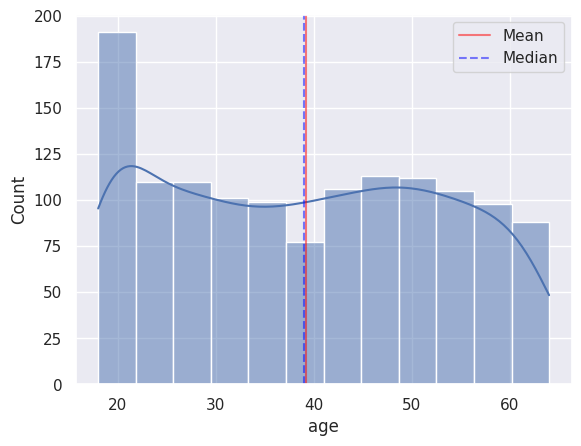

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = ins['age'], kde = True) # creating histogram with density plot
plt.axvline(x=ins.age.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=ins.age.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend() # adding legend

From the above graph it is observed that mean and median are almost same for age. So here we can say that the data is normally distributed.

It is fulfilling normal distribution assumption mean = median.

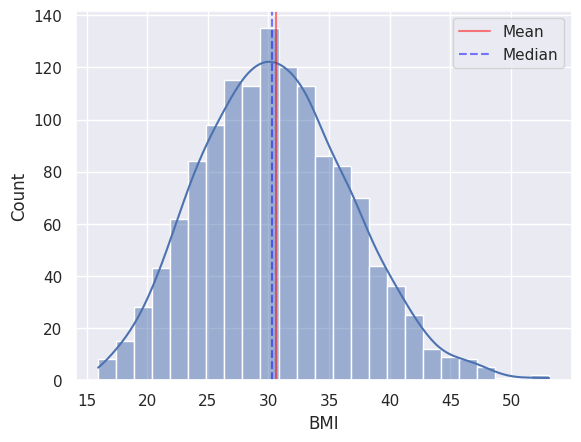

In [42]:
sns.histplot(data = ins['BMI'], kde = True) # creating histogram with density plot
plt.axvline(x=ins.BMI.mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=ins.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend() # adding legend

BMI is showing perfectly normal distribution.

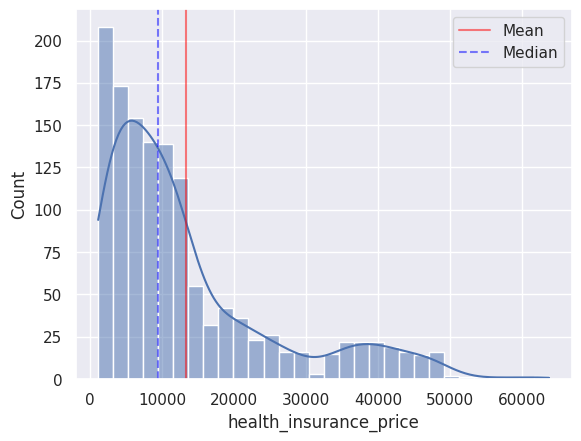

In [43]:
sns.histplot(data = ins['health_insurance_price'], kde = True) # creating histogram with density plot
plt.axvline(x=ins.health_insurance_price .mean(),color='red',alpha=0.5,label='Mean') # adding vartical line as mean
plt.axvline(x=ins.health_insurance_price .median(),c='blue',ls='--',alpha=0.5,label='Median') # adding vartical line as median
plt.legend() # adding legend

health_insurance_price is right skewed data.

Checking for correlation between features of the data.

<Axes: >

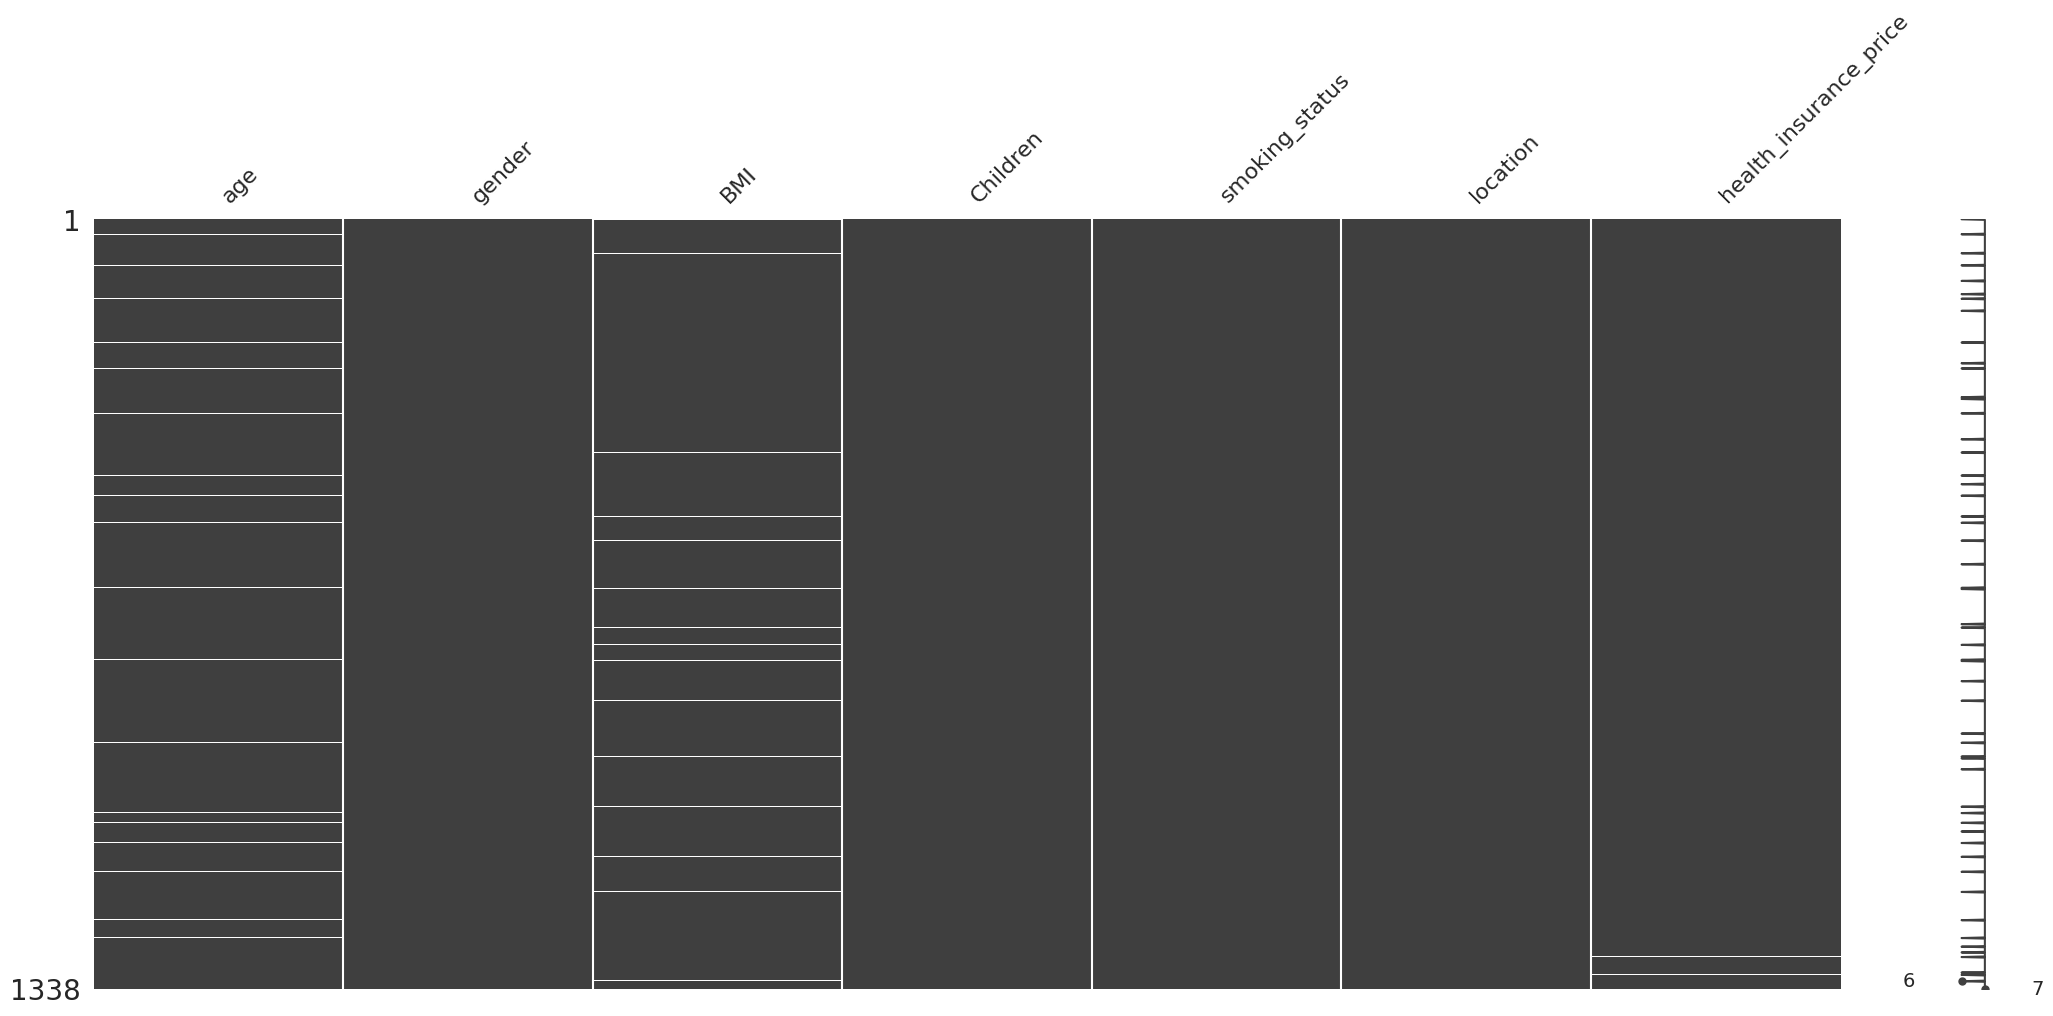

In [44]:
import missingno as msno
msno.matrix(ins)

So from the above graph we can observe that there is no such correlation between missing values of the data.

Checking for correlation matrxi for the festures of the data.

In [45]:
import plotly.figure_factory as ff
ins_corr = ins.corr() # Generate correlation matrix for pearson correlation

x = list(ins_corr.columns)
y = list(ins_corr.index)
z = np.array(ins_corr)

fig = ff.create_annotated_heatmap(
z,
x = x,
y = y ,
annotation_text = np.around(z, decimals=2),
hoverinfo='z',
colorscale='Viridis'
)
fig.show()

<ipython-input-45-0887844e73e2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



From the heat map we can observe that there are no highly correlated values in the data which will affect our analysis further so we are good.

## 4. EDA: Exploratory Data Analysis

From above we now have general idea about the nature of our data set. Now we will perform required feature engineering techniques.

* Firstly we will perform imputation techniques to deal with missing values.

For age and BMI we will mean imputation as they have normal distribution and for health_insurance_price we will use median imputation because it have right skewed distribution.

We are using mean and median imputation because we have only few missing values which can be dealt using these techniques.

In [46]:
## Converting males to 0 and females to 1

ins['gender'] = ins.gender.map({'male': 0, 'female':1})
ins['smoking_status'] = ins.smoking_status.map({'no': 0, 'yes':1})
ins['location'] = ins.location.map({'southwest': 0, 'northwest':1, 'northeast':2, 'southeast': 3})

**METHOD 1**

In [47]:
ins_mean = ins.copy()  # create a copy of the original data frame to avoid modifying the original data
ins_mean['BMI'].fillna(ins_mean['BMI'].mean(), inplace=True)

print(ins_mean)

# Perform median imputation
ins_median = ins.copy()
ins_median['health_insurance_price'].fillna(ins_median['health_insurance_price'].median(), inplace=True)  # fill missing values in 'age' with median

print(ins_median)

# Perform KNN imputation (assuming you have already imported and used the KNNImputer from sklearn)
from sklearn.impute import KNNImputer
ins_knn = ins.copy()
knn_imputer = KNNImputer(n_neighbors=5)  # define KNNImputer with desired parameters
ins_knn['age'] = knn_imputer.fit_transform(ins_knn['age'].values.reshape(-1, 1))  # perform KNN imputation on 'age'

print('ins_knn')

       age  gender        BMI  Children  smoking_status  location  \
0     19.0       1  30.638217         0               1         0   
1     18.0       0  33.770000         1               0         3   
2     28.0       0  33.000000         3               0         3   
3     33.0       0  22.705000         0               0         1   
4     32.0       0  28.880000         0               0         1   
...    ...     ...        ...       ...             ...       ...   
1333  50.0       0  30.970000         3               0         1   
1334  18.0       1  31.920000         0               0         2   
1335  18.0       1  36.850000         0               0         3   
1336  21.0       1  25.800000         0               0         0   
1337  61.0       1  29.070000         0               1         1   

      health_insurance_price  
0                16884.92400  
1                 1725.55230  
2                 4449.46200  
3                21984.47061  
4               

**METHOD 2**

In [48]:
from sklearn.impute import SimpleImputer # importing simple imputer

ins_new = ins.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
ins_new.iloc[:, :] = mean_imputer.fit_transform(ins_new)

print(ins_new)

       age  gender        BMI  Children  smoking_status  location  \
0     19.0     1.0  30.638217       0.0             1.0       0.0   
1     18.0     0.0  33.770000       1.0             0.0       3.0   
2     28.0     0.0  33.000000       3.0             0.0       3.0   
3     33.0     0.0  22.705000       0.0             0.0       1.0   
4     32.0     0.0  28.880000       0.0             0.0       1.0   
...    ...     ...        ...       ...             ...       ...   
1333  50.0     0.0  30.970000       3.0             0.0       1.0   
1334  18.0     1.0  31.920000       0.0             0.0       2.0   
1335  18.0     1.0  36.850000       0.0             0.0       3.0   
1336  21.0     1.0  25.800000       0.0             0.0       0.0   
1337  61.0     1.0  29.070000       0.0             1.0       1.0   

      health_insurance_price  
0                16884.92400  
1                 1725.55230  
2                 4449.46200  
3                21984.47061  
4               

<ipython-input-48-b5bb20e54f7e>:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [49]:
ins_new.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

From the above output we can observe that all missing values are removed.

**Encoding of the features**

In [50]:
#One-hot encoder

from sklearn.preprocessing import LabelEncoder

Oh = OneHotEncoder()
ins_gender = pd.DataFrame(Oh.fit_transform(ins[["gender"]]))

ins_gender

,0
0,"(0, 1)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 0)\t1.0"
...,...
1333,"(0, 0)\t1.0"
1334,"(0, 1)\t1.0"
1335,"(0, 1)\t1.0"
1336,"(0, 1)\t1.0"


In [51]:
ins_smoking_status = pd.DataFrame(Oh.fit_transform(ins[["smoking_status"]]))

ins_smoking_status

,0
0,"(0, 1)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 0)\t1.0"
...,...
1333,"(0, 0)\t1.0"
1334,"(0, 0)\t1.0"
1335,"(0, 0)\t1.0"
1336,"(0, 0)\t1.0"


In [52]:
ins_location = pd.DataFrame(Oh.fit_transform(ins[["location"]]))

ins_location

,0
0,"(0, 0)\t1.0"
1,"(0, 3)\t1.0"
2,"(0, 3)\t1.0"
3,"(0, 1)\t1.0"
4,"(0, 1)\t1.0"
...,...
1333,"(0, 1)\t1.0"
1334,"(0, 2)\t1.0"
1335,"(0, 3)\t1.0"
1336,"(0, 0)\t1.0"


In [53]:
ins_new.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1.0,30.638217,0.0,1.0,0.0,16884.92400
1,18.0,0.0,33.770000,1.0,0.0,3.0,1725.55230
2,28.0,0.0,33.000000,3.0,0.0,3.0,4449.46200
3,33.0,0.0,22.705000,0.0,0.0,1.0,21984.47061
4,32.0,0.0,28.880000,0.0,0.0,1.0,3866.85520


In [54]:
ins_new.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

**Removing outliers**

<Axes: ylabel='health_insurance_price'>

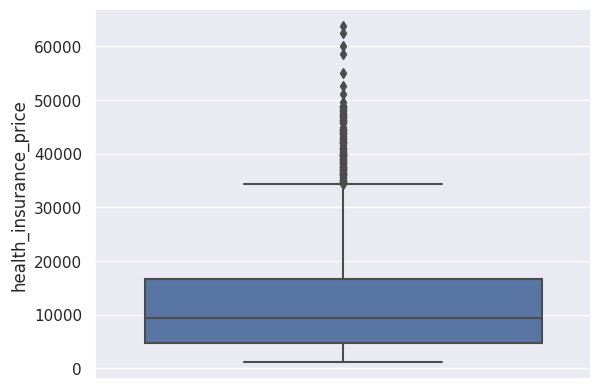

In [55]:
sns.boxplot(y=ins['health_insurance_price'])

<Axes: ylabel='BMI'>

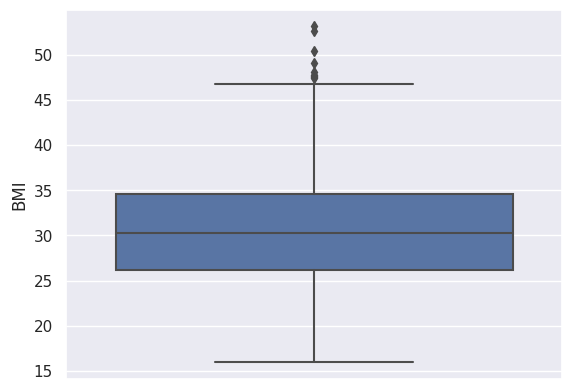

In [56]:
sns.boxplot(y=ins['BMI'])

From above two box-plots we can notice presence of outiers in BMI and health insurance price.

No outliers are present so we can move further.

# 5. Machine learning approach

storing Independent variables and dependent variables separately

In [57]:
#features Column
X = ins_new.drop(['health_insurance_price'] , axis = 1)

In [58]:
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,1.0,30.638217,0.0,1.0,0.0
1,18.0,0.0,33.770000,1.0,0.0,3.0
2,28.0,0.0,33.000000,3.0,0.0,3.0
3,33.0,0.0,22.705000,0.0,0.0,1.0
4,32.0,0.0,28.880000,0.0,0.0,1.0
...,...,...,...,...,...,...
1333,50.0,0.0,30.970000,3.0,0.0,1.0
1334,18.0,1.0,31.920000,0.0,0.0,2.0
1335,18.0,1.0,36.850000,0.0,0.0,3.0
1336,21.0,1.0,25.800000,0.0,0.0,0.0


In [59]:
#Target/Response Variable
y = ins_new['health_insurance_price']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64

Splitting the data into test and train set.

In [61]:
# Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 101)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [63]:
print(X_train)
print(y_train)

            age  gender     BMI  Children  smoking_status  location
804   23.000000     0.0  26.510       0.0             0.0       3.0
354   18.000000     1.0  38.280       0.0             0.0       3.0
563   50.000000     0.0  44.770       1.0             0.0       3.0
1177  40.000000     1.0  27.400       1.0             0.0       0.0
390   48.000000     0.0  35.625       4.0             0.0       2.0
...         ...     ...     ...       ...             ...       ...
575   58.000000     1.0  27.170       0.0             0.0       1.0
973   19.000000     1.0  40.500       0.0             0.0       0.0
75    57.000000     0.0  34.010       0.0             0.0       1.0
599   39.166412     1.0  37.525       2.0             0.0       1.0
863   36.000000     1.0  19.855       0.0             0.0       2.0

[1070 rows x 6 columns]
804      1815.87590
354     14133.03775
563      9058.73030
1177     6496.88600
390     10736.87075
           ...     
575     12222.89830
973      1759.33800

**Feature Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.16779777, -0.99626864, -0.68856045, -0.92785237, -0.5174674 ,
         1.29576129],
       [-1.52982703,  1.00374533,  1.26142566, -0.92785237, -0.5174674 ,
         1.29576129],
       [ 0.78716025, -0.99626864,  2.33665165, -0.09635988, -0.5174674 ,
         1.29576129],
       ...,
       [ 1.29400121, -0.99626864,  0.55399655, -0.92785237, -0.5174674 ,
        -0.47156131],
       [ 0.00274509,  1.00374533,  1.13634159,  0.73513261, -0.5174674 ,
        -0.47156131],
       [-0.22652169,  1.00374533, -1.79112269, -0.92785237, -0.5174674 ,
         0.41209999]])

In [65]:
X_test=sc.transform(X_test)
X_test

array([[-0.08170998, -0.99626864,  1.05764631, -0.09635988, -0.5174674 ,
         0.41209999],
       [-1.38501532,  1.00374533, -0.3116515 , -0.92785237, -0.5174674 ,
         0.41209999],
       [ 1.07678366, -0.99626864, -0.86251843, -0.09635988, -0.5174674 ,
         0.41209999],
       ...,
       [-1.16779777, -0.99626864, -2.20033813, -0.09635988, -0.5174674 ,
        -0.47156131],
       [ 1.36640707,  1.00374533,  0.40323296, -0.92785237, -0.5174674 ,
        -1.35522262],
       [ 1.29400121,  1.00374533, -0.0283485 , -0.92785237, -0.5174674 ,
        -0.47156131]])

**Model Import**

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Training

In [67]:
lr = LinearRegression()
lr.fit(X_train , y_train)
svm = SVR()
svm.fit(X_train , y_train)
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train , y_train)

GradientBoostingRegressor()

**Prediction on Test Data**

In [69]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'actual' : y_test, 'Lr' : y_pred1,
                  'svm' : y_pred2 , 'rf' : y_pred3 , 'gr' : y_pred4})

In [70]:
df1

,actual,Lr,svm,rf,gr
44,6079.67150,10339.953823,9329.041274,8906.193422,7341.288390
134,2457.21115,2574.071753,9272.214021,3131.792157,3268.854297
980,25517.11363,10210.197269,9375.794385,12165.128170,12475.206293
618,34439.85590,27330.610176,9400.190422,35974.607933,34913.026825
1238,6985.50695,6009.545457,9334.600955,8691.737386,7639.591447
...,...,...,...,...,...
648,1712.22700,2101.592169,9278.543605,3282.949449,3684.839163
1023,1711.02680,726.265536,9305.013741,3358.111122,3170.321159
28,2775.19215,-73.685389,9309.159927,9460.624946,4995.964442
798,11848.14100,13314.795059,9402.343983,11962.377232,12249.494604


Comparing models visually

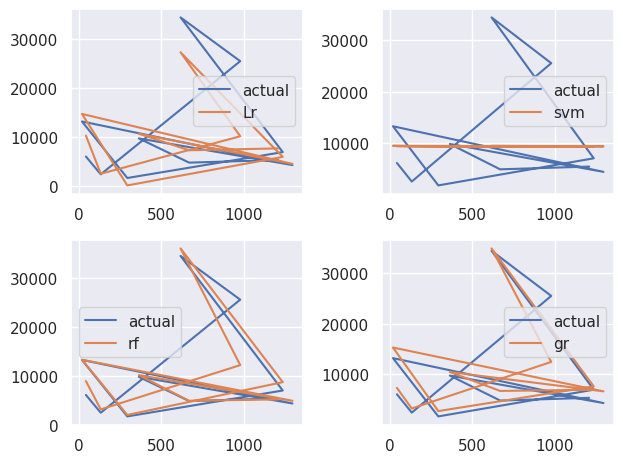

In [71]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['Lr'].iloc[0:11] , label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['svm'].iloc[0:11] , label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['rf'].iloc[0:11] , label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['gr'].iloc[0:11] , label = 'gr')

plt.tight_layout()
plt.legend()

**Evaluating the Algorithm**

we will evaluate our model using R2 , R2 is used to measure the goodness of fit , greater the value of R2 better the Regression model. Since we are having multiple linear regression problem , we can't use R2 value to evaluate accuracy of model , so we need to use adjusted R2 method.

In [72]:
#evaluating using metrics
from sklearn import metrics

In [73]:
r2m1 = metrics.r2_score(y_test , y_pred1)
r2m2 = metrics.r2_score(y_test , y_pred2)
r2m3 = metrics.r2_score(y_test , y_pred3)
r2m4 = metrics.r2_score(y_test , y_pred4)

In [74]:
print(r2m1,r2m2,r2m3,r2m4)

0.7527928693989829 -0.0792327371813013 0.8317144047460261 0.8507258441574944


Note: Since we are having multiple linear regression problem , we can't use R2 value to evaluate accuracy of model , so we need to use adjusted R2 method

In [75]:
n= 1336   #number of observations
k=6  #number of independent variables
adj_r2_scorem1 = 1 - ((1-r2m1)*(n-1)/(n-k-1))
print(adj_r2_scorem1)

adj_r2_scorem2 = 1 - ((1-r2m2)*(n-1)/(n-k-1))
print(adj_r2_scorem2)

adj_r2_scorem3 = 1 - ((1-r2m3)*(n-1)/(n-k-1))
print(adj_r2_scorem3)

adj_r2_scorem4 = 1 - ((1-r2m4)*(n-1)/(n-k-1))
print(adj_r2_scorem4)

0.7516768101186172
-0.08410511974193935
0.830954650365647
0.8500519202033522


**Observation**

We can see that Model 4 is performing better than any other Model , that is Gradient Boosting Algorithm.

In [76]:
#evaluating using Mean Absolute Error
s1 = metrics.mean_absolute_error(y_test , y_pred1)
s2 = metrics.mean_absolute_error(y_test , y_pred2)
s3 = metrics.mean_absolute_error(y_test , y_pred3)
s4 = metrics.mean_absolute_error(y_test , y_pred4)

print(s1,s2,s3,s4)

4133.815470361056 7939.9046481227915 2807.281152003478 2615.354714106026


**Observations**

**Mean Absolute error is also used to measure the accuracy of Model**
*   Here , the lower is better.
*   we can see here also Model 4(Gradient Boosting Regression Model) is performing better among all Models .

**Mean of residuals**

It should be close to zero

In [77]:
residuals = y_test.values-y_pred1
mean_residuals = np.mean(residuals)
print("Mean of Residuals LR {}".format(mean_residuals))

residuals = y_test.values-y_pred2
mean_residuals = np.mean(residuals)
print("Mean of Residuals SVM {}".format(mean_residuals))

residuals = y_test.values-y_pred3
mean_residuals = np.mean(residuals)
print("Mean of Residuals RF {}".format(mean_residuals))

residuals = y_test.values-y_pred4
mean_residuals = np.mean(residuals)
print("Mean of Residuals GR {}".format(mean_residuals))

Mean of Residuals LR 247.77183421380394
Mean of Residuals SVM 3467.3628425257143
Mean of Residuals RF -183.18963298540785
Mean of Residuals GR 46.646286128725855


**Homoscedasticity**

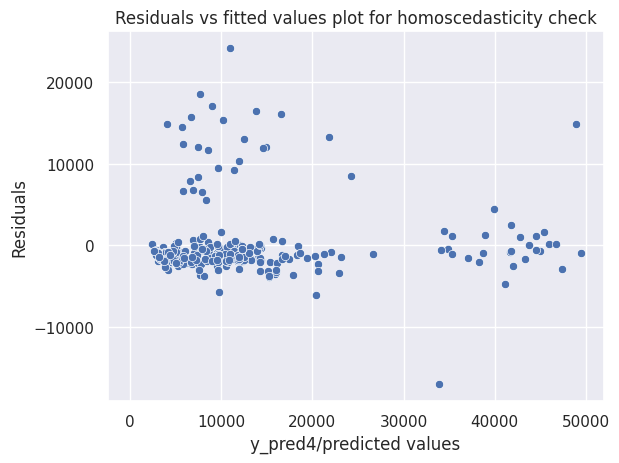

In [78]:
p = sns.scatterplot(x=y_pred4, y=residuals)
plt.xlabel('y_pred4/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,2.6],y=[0,0],color='Blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

<ipython-input-79-36e09b82e726>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='health_insurance_price', ylabel='Density'>

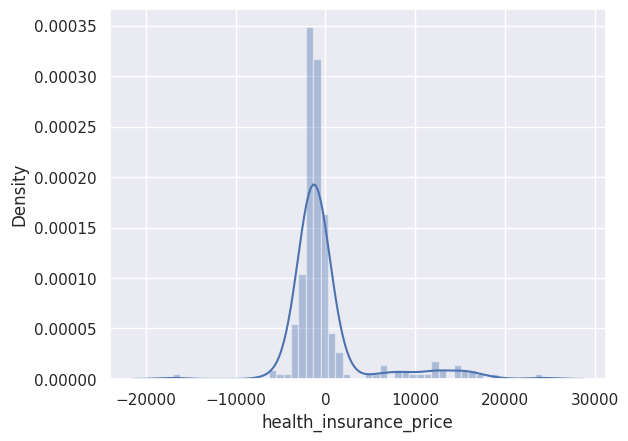

In [79]:
#Errors should be normally distributed
sns.distplot((y_test-y_pred4),bins=50)

**Conclusion**

* Gradient Boosting Algorithm is giving best results.
* So , we will use Gradient Boosting Algorithm for Model Deployment.

# Predicting house_insurance_price for new customer

In [80]:
# Predictions from our Model
# Let's grab predictions off our test set and see how well it did!


predictions = gr.predict(X_test)

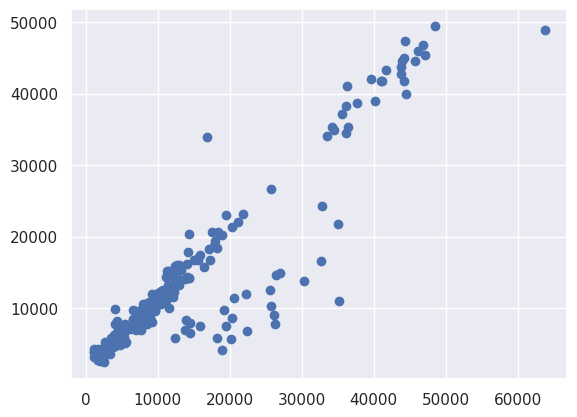

In [81]:
plt.scatter(y_test,predictions)

In [82]:
data = {'age' : 18.0,
        'gender' : 0 ,
        'BMI' : 31.92 ,
        'Children' : 0 ,
        'smoking_status' : 0,
        'location' : 4 }

df = pd.DataFrame(data , index = [0])
df

,age,gender,BMI,Children,smoking_status,location
0,18.0,0,31.92,0,0,4


In [83]:
new_pred = gr.predict(df)
print(new_pred)

[14160.31173163]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names

